In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Section 1 - Load and Visualise the Data
- Download
- Load 
- Visualise
- Normalisation

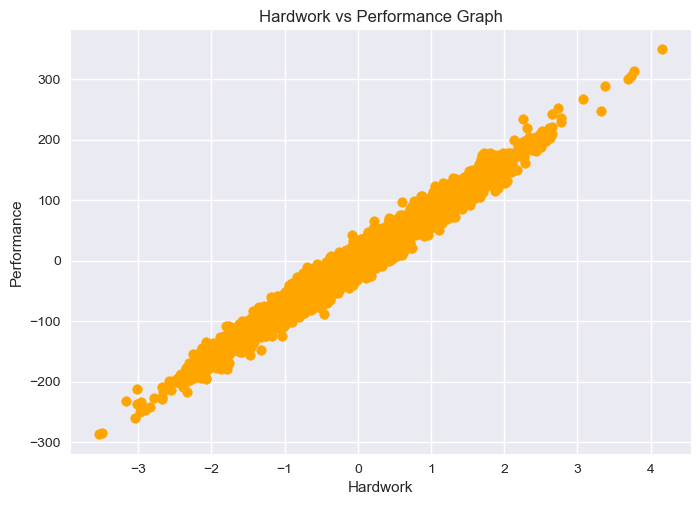

In [2]:
# Load
X = pd.read_csv('./Training Data/Linear_X_Train.csv')
y = pd.read_csv('./Training Data/Linear_Y_Train.csv')

# Convert X,Y to Numpy arrays
X = X.values
y = y.values

# Normalisation
u = X.mean()
std = X.std()
X = (X-u)/std


# Visualise
plt.style.use('seaborn')
plt.scatter(X,y,color='orange')
plt.title("Hardwork vs Performance Graph")
plt.xlabel("Hardwork")
plt.ylabel("Performance")
plt.show()

### Section 2 - Linear Regression

In [3]:
def hypothesis(x,theta):
    y_ = theta[0] + theta[1]*x
    return y_

def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        x = X[i]
        y_ = hypothesis(x,theta)
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x
    return grad/m

def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error += (y_ - Y[i])**2
        
    return (total_error/m)
    

def gradientDescent(X,Y,max_steps=100,learning_rate =0.1):
    
    theta = np.zeros((2,))
    error_list = []
    theta_list = []
    
   
    for i in range(max_steps):
        
        # Compute grad
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)[0]
        
        
        #Update theta
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        # Storing the theta values during updates
        theta_list.append((theta[0],theta[1]))
        error_list.append(e)
        
    return theta,error_list,theta_list


In [4]:
theta,error_list,theta_list = gradientDescent(X,y)

In [5]:
theta

array([ 0.6838508 , 79.90361453])

In [6]:
#theta_list

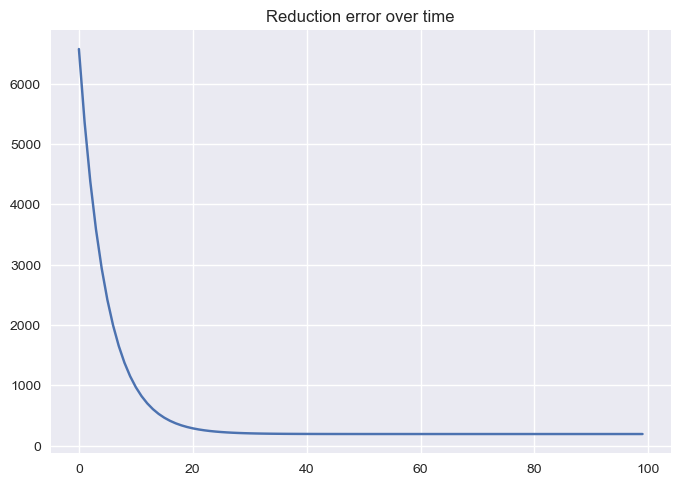

In [7]:
plt.plot(error_list)
plt.title("Reduction error over time")
plt.show()

### Section - 3 Predictions and Best Line

In [8]:
y_ = hypothesis(X,theta)
print(y_)

[[-19.5733619 ]
 [-43.69571729]
 [ 86.4848761 ]
 ...
 [-20.85044708]
 [138.70197319]
 [-35.87897262]]


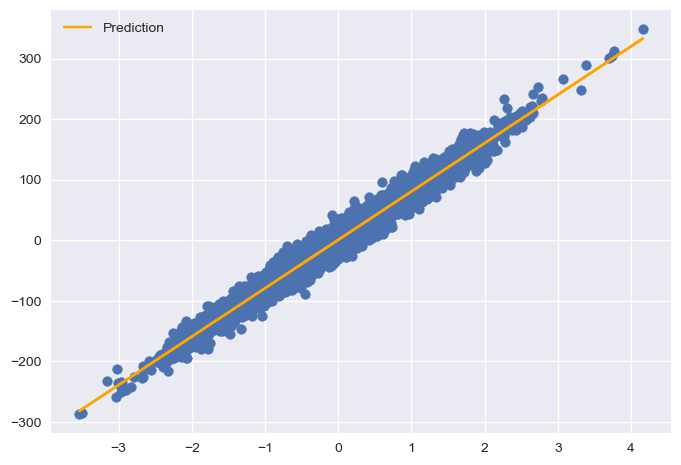

In [9]:
# Training + Predictions
plt.scatter(X,y)
plt.plot(X,y_,color='orange',label="Prediction")
plt.legend()
plt.show()

In [10]:
# Load the test data
X_test = pd.read_csv('./Test Cases/Linear_X_Test.csv').values
y_test = hypothesis(X_test,theta)

In [11]:
df = pd.DataFrame(data=y_test,columns=["y"])


In [12]:
df.to_csv('y_prediction.csv',index=False)

### Section - 4 Computing Score
Score : R2 (R-Squared) or Coefficient of Determination



In [13]:
def r2_score(Y,Y_):
    # Instead of Loop, np.sum is recommended as it is fast
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y- Y.mean())**2)
    score = (1- num/denom)
    return score*100
    

In [14]:
r2_score(y,y_)

97.09612226971643

### Section - 5 Visualising Loss Function, Gradient Descent Trajectory, Theta Updates

In [15]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [16]:
theta

array([ 0.6838508 , 79.90361453])

In [17]:
# Loss Actually 
T0 = np.arange(-40,40,1)
T1 = np.arange(40,120,1)

T0,T1 = np.meshgrid(T0,T1)
J = np.zeros(T0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_ = T1[i,j]*X + T0[i,j]
        J[i,j] = np.sum((y-y_)**2)/y.shape[0]

#print(J.shape)

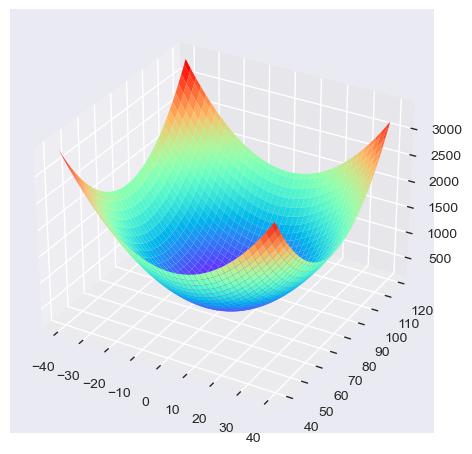

In [18]:
# Visualise the J (Loss)

fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
plt.show()

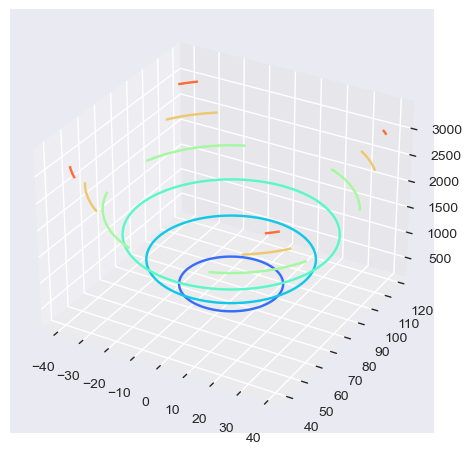

In [19]:
# Contour Plot 
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
plt.show()


###  Plot the changes in values of theta

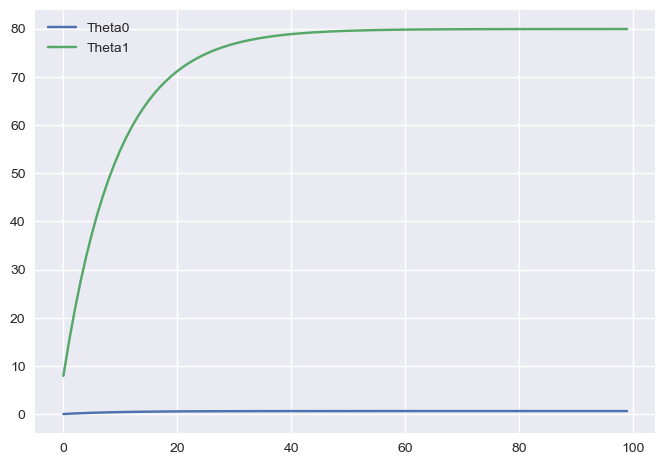

In [20]:
theta_list = np.array(theta_list)
plt.plot(theta_list[:,0],label="Theta0")
plt.plot(theta_list[:,1],label="Theta1")
plt.legend()
plt.show()

## Trajectory traced by Theta Updates in the Loss Function

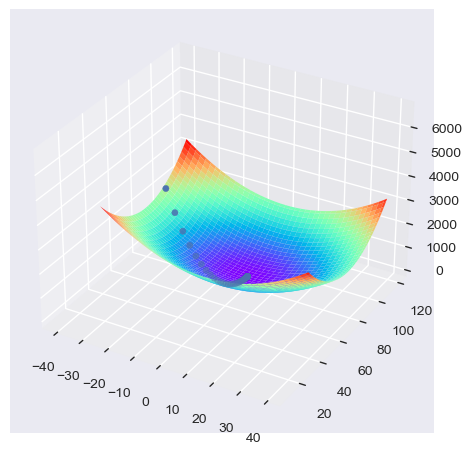

In [21]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

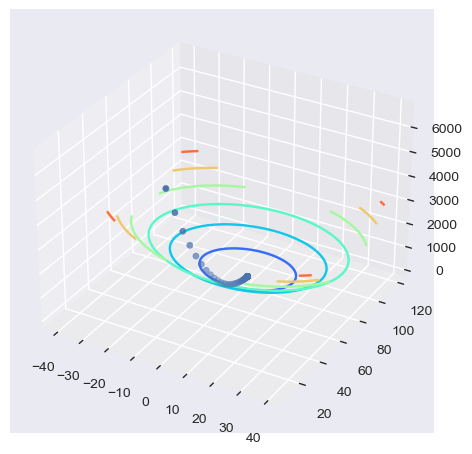

In [22]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

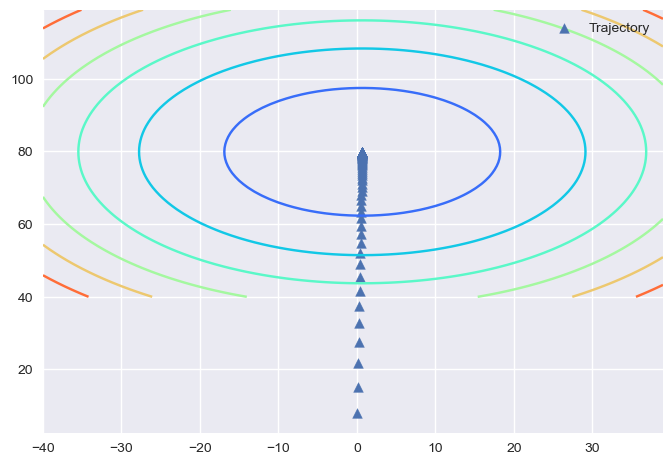

In [23]:
# 2D Contour Plot 
plt.contour(T0,T1,J,cmap='rainbow')
plt.scatter(theta_list[:,0],theta_list[:,1],marker='^',label='Trajectory')
plt.legend()
plt.show()

In [24]:
# Save the data in file

theta_list
np.save("ThetaList.npy",theta_list)

In [25]:
np.save?

Signature: np.save(file, arr, allow_pickle=True, fix_imports=True)
Docstring:
Save an array to a binary file in NumPy ``.npy`` format.

Parameters
----------
file : file, str, or pathlib.Path
    File or filename to which the data is saved.  If file is a file-object,
    then the filename is unchanged.  If file is a string or Path, a ``.npy``
    extension will be appended to the filename if it does not already
    have one.
arr : array_like
    Array data to be saved.
allow_pickle : bool, optional
    Allow saving object arrays using Python pickles. Reasons for disallowing
    pickles include security (loading pickled data can execute arbitrary
    code) and portability (pickled objects may not be loadable on different
    Python installations, for example if the stored objects require libraries
    that are not available, and not all pickled data is compatible between
    Python 2 and Python 3).
    Default: True
fix_imports : bool, optional
    Only useful in forcing objects in obje